### Assignment 2: Compare Tests for Goodness of fit

Follow the skeleton notebook Assignment 2 Test that in fact binomial and Poisson distribution look increasingly more similar to Gaussians as the mean of the distribution increases.

show the distributions, the models, clearly state the H0 null hypothesis, and properly interpret the tests (remember captions, significance, etc etc)

In [35]:
from __future__ import print_function
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats as st

Populating the interactive namespace from numpy and matplotlib


Test a normal distribution (Gaussian, mean = 0, std = 1) against a Gaussian model, and a Poisson with small $lambda$, or a binomial w small np against a Gaussian model. I expect to find that in the first case the Gaussian is, well, Gaussian and in the second case that the binomial with small np is NOT Gaussian

In [37]:
#Show the distributions
alpha = 0.05
np.random.seed(999)
dist_gaussian = np.random.randn(1000)

#test AD and KS test
print ("normal on normal", st.kstest(dist_gaussian,'norm'))
print ("normal on normal", st.anderson(dist_gaussian, dist = 'norm'))

normal on normal KstestResult(statistic=0.016344431331899001, pvalue=0.95212890203293565)
normal on normal AndersonResult(statistic=0.26231814126674635, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


## KS: high p-value pvalue>0.05: H0 that sample comes from a Gaussian distribution cannot be rejected

## AD: at alpha = 0.05 the statistics = 0.26 is smaller than the 0.784 critical value for $alpha$=0.05 (thresh_0.05 = 0.784): the H0 cannot be rejected.

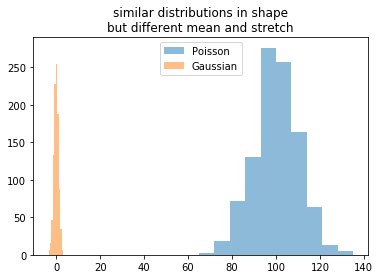

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=0.72428815547550585, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


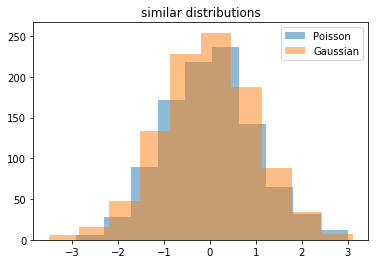

poisson vs normal KstestResult(statistic=0.030537538725986857, pvalue=0.30353169660170898)
poisson vs normal AndersonResult(statistic=0.92641226504883889, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
Ks:higher p-value, we cannot reject the H0 at alpha=0.05
AD: statistics AD=0.92 larger than threshold(for alpha=0.05)
thresh_0.05 = 0.784 0.784


In [44]:
np.random.seed(999)
dist_poisson = np.random.poisson(100,1000)
pl.figure()
pl.hist(dist_poisson,alpha=0.5, label='Poisson')
pl.hist(dist_gaussian,alpha=0.5,label='Gaussian')
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print("poisson on normal", st.kstest(dist_poisson,'norm'))
print("poisson on normal", st.anderson(dist_poisson, dist='norm'))

dist_poisson = (np.random.poisson(100,1000) - 100)*0.1
pl.figure()
pl.hist(dist_poisson,alpha = 0.5,label="Poisson")
pl.hist(dist_gaussian, alpha = 0.5, label = "Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print("poisson vs normal", st.kstest(dist_poisson,'norm'))
print("poisson vs normal", st.anderson(dist_poisson, dist='norm'))
print("Ks:higher p-value, we cannot reject the H0 at alpha=0.05")
print("AD: statistics AD=0.92 larger than threshold(for alpha=0.05)")

threshold =st.anderson(dist_gaussian,dist='norm')[1][st.anderson(dist_gaussian,dist='norm')[2]==[5.0]]

print("thresh_0.05 = 0.784", threshold[0])

n=10
p = 0.5
dist_binomial = (np.random.binomial(n,p,1000) - n*p)

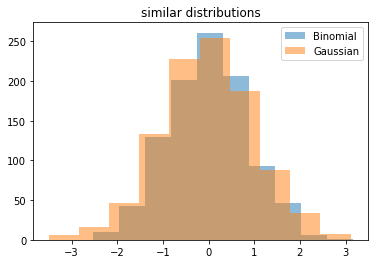

binomial vs normal KstestResult(statistic=0.14600000000000002, pvalue=0.0)
binomial vs normal AndersonResult(statistic=17.077836483634655, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: lower p-value, we reject the $H_0$ at alpha=0.05
AD: statistics AD=16.19 larger than threshold(for alpha=0.5), reject the $H_0 at alpha=0.05


In [45]:
n = 10
p = 0.5
dist_binomial = (np.random.binomial(n,p,1000)-n*p)/np.sqrt(n*p*(1-p))
pl.figure()
pl.hist(dist_binomial,alpha=0.5,label = "Binomial")
pl.hist(dist_gaussian,alpha=0.5,label ="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print("binomial vs normal", st.kstest(dist_binomial, 'norm'))
print("binomial vs normal", st.anderson(dist_binomial, dist='norm'))

print("KS: lower p-value, we reject the $H_0$ at alpha=0.05")
print("AD: statistics AD=16.19 larger than threshold(for alpha=0.5), reject the $H_0 at alpha=0.05")


#  KL DIVERGENCE

In [40]:
distpdf_gaussian, mybins_gaussian, = np.histogram(dist_gaussian, density = True)
distpdf_poisson, mybins_poisson, = np.histogram(dist_poisson, density = True)
distpdf_binomial, mybins_binomial, = np.histogram(dist_binomial, density = True)

In [138]:
bincenters_gaussian = mybins_gaussian[:-1] +0.5*(mybins_gaussian[1]-mybins_gaussian[0])
bincenters_poisson = mybins_poisson[:-1]+ 0.5*(mybins_poisson[1]-mybins_poisson[0])
bincenters_binomial = mybins_binomial[:-1]+0.5*(mybins_binomial[1] - mybins_binomial[0])

print("normal on normal", st.entropy(distpdf_gaussian, st.norm.pdf(bincenters_gaussian)))
print("poisson on normal", st.entropy(distpdf_poisson, st.norm.pdf(bincenters_poisson)))
print("binomial on normal", st.entropy(distpdf_binomial, st.norm.pdf(bincenters_binomial)))

normal on normal 0.00527211066212
poisson on normal 0.00523311596851
binomial on normal 0.014866650151


Null Hypothesis:           
There is no information loss between distributions

Poisson Distribution has a lower entrpy while Binomial Distribution has a significantly higher one, but overally the entrophy is still low
therefore they are acceptable alternative distributions for a Gaussian distribution.

# Binomial

In [122]:
np.random.seed(999)
narray = np.linspace(1,1001,100)
#first,I did: mysize = (2000 / (np.array(range(1, 101)))).astype(int), but the graph doesn't approporiately show the correct relationship because of repeated numbers

narray

array([  1.00000000e+00,   1.11010101e+01,   2.12020202e+01,
         3.13030303e+01,   4.14040404e+01,   5.15050505e+01,
         6.16060606e+01,   7.17070707e+01,   8.18080808e+01,
         9.19090909e+01,   1.02010101e+02,   1.12111111e+02,
         1.22212121e+02,   1.32313131e+02,   1.42414141e+02,
         1.52515152e+02,   1.62616162e+02,   1.72717172e+02,
         1.82818182e+02,   1.92919192e+02,   2.03020202e+02,
         2.13121212e+02,   2.23222222e+02,   2.33323232e+02,
         2.43424242e+02,   2.53525253e+02,   2.63626263e+02,
         2.73727273e+02,   2.83828283e+02,   2.93929293e+02,
         3.04030303e+02,   3.14131313e+02,   3.24232323e+02,
         3.34333333e+02,   3.44434343e+02,   3.54535354e+02,
         3.64636364e+02,   3.74737374e+02,   3.84838384e+02,
         3.94939394e+02,   4.05040404e+02,   4.15141414e+02,
         4.25242424e+02,   4.35343434e+02,   4.45444444e+02,
         4.55545455e+02,   4.65646465e+02,   4.75747475e+02,
         4.85848485e+02,

In [140]:
ks_s_binomial = np.zeros(100)
ks_p_binomial = np.zeros(100)
ad_binomial = np.zeros(100)
kl_binomial = np.zeros(100)
chi_s_binomial = np.zeros(100)
chi_p_binomial = np.zeros(100)

In [141]:
for i,n in enumerate(narray):
    p = 0.5
    dist = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))
    ks_s_binomial[i] = st.kstest(dist,'norm')[0]
    ks_p_binomial[i] = st.kstest(dist,'norm')[1]
    ad_binomial[i] = st.anderson(dist,dist = 'norm')[0]
    
    mybins = np.linspace(min(dist),max(dist),10)
    bincenters = mybins[:-1] + 0.5*(mybins[1]-mybins[0])
    
    kl_binomial[i] = st.entropy(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))
    chi_s_binomial[i] = st.chisquare(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[0]
    chi_p_binomial[i] = st.chisquare(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[1]

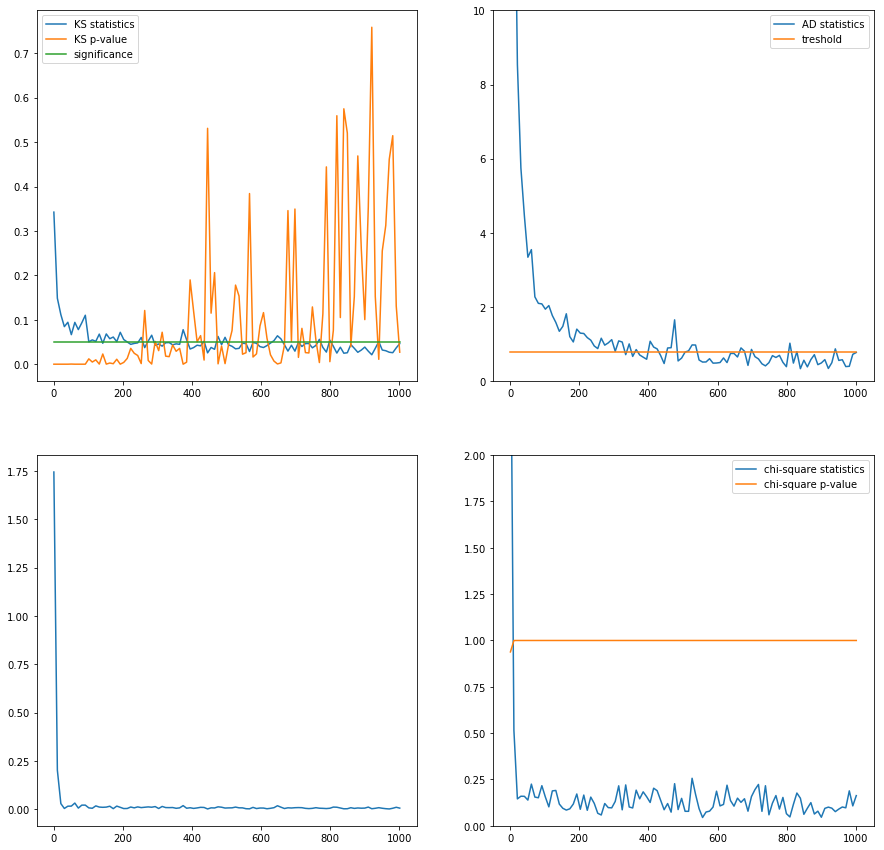

In [142]:
threshold = st.anderson(dist_gaussian, dist='norm')[1][st.anderson(dist_gaussian,dist='norm')[2]==[5.0]]

fig = pl.figure(figsize = (15,15))

fig.add_subplot(221)
pl.plot(narray, ks_s_binomial, label='KS statistics')
pl.plot(narray, ks_p_binomial, label='KS p-value')
pl.plot([narray[0], narray[-1]],[0.05, 0.05], label="significance")
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_binomial,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_binomial, label='K-L (entropy)')

fig.add_subplot(224)
pl.plot(narray,chi_s_binomial, label='chi-square statistics')
pl.plot(narray,chi_p_binomial, label='chi-square p-value')
pl.ylim(0,2)
pl.legend()

pl.legend();
print("Fig 1. Different goodness-of-fit tests for binomial distribution with different means against gaussian distribution")

#### KS Test: 
Null Hypothesis: The binomial distribution is identical with the Gaussian distribution

Interpretation: As the KS statistics decrease, the p-value has a tendency of becoming larger, therefore it's less likely for us to reject the null hypothesis, the binomial distribution grows similar to Gaussian distribution

#### AD Test:
Null Hypothesis: The sample from a binomial population is no different from the population from a Gaussian distribution 

Interpretation: AD statics drops below the threshold of rejecting $H_0$, therefore we cannot reject the null hypothesis

#### KL Divergence:
Null Hypothesis: There is no information loss between the binomial distribution and Gaussian distribution

Interpretation: The entropy drop means that information loss between the binomial and the Gaussian distribution decreases, it's less likely for us to reject the null hypothesis

#### Chi-square test:
Null Hypothesis: The observed binomial distribution has no difference than the expected normal distribution

Interpretation: p-values increases as Chi-sq statistics drop, therefore we are less likely to reject $H_0$ as mean grows.

## Poisson

In [130]:
np.random.seed(999)

In [132]:
narray = np.linspace(1,1001,100)
narray

array([  1.00000000e+00,   1.11010101e+01,   2.12020202e+01,
         3.13030303e+01,   4.14040404e+01,   5.15050505e+01,
         6.16060606e+01,   7.17070707e+01,   8.18080808e+01,
         9.19090909e+01,   1.02010101e+02,   1.12111111e+02,
         1.22212121e+02,   1.32313131e+02,   1.42414141e+02,
         1.52515152e+02,   1.62616162e+02,   1.72717172e+02,
         1.82818182e+02,   1.92919192e+02,   2.03020202e+02,
         2.13121212e+02,   2.23222222e+02,   2.33323232e+02,
         2.43424242e+02,   2.53525253e+02,   2.63626263e+02,
         2.73727273e+02,   2.83828283e+02,   2.93929293e+02,
         3.04030303e+02,   3.14131313e+02,   3.24232323e+02,
         3.34333333e+02,   3.44434343e+02,   3.54535354e+02,
         3.64636364e+02,   3.74737374e+02,   3.84838384e+02,
         3.94939394e+02,   4.05040404e+02,   4.15141414e+02,
         4.25242424e+02,   4.35343434e+02,   4.45444444e+02,
         4.55545455e+02,   4.65646465e+02,   4.75747475e+02,
         4.85848485e+02,

In [134]:
ks_s_poisson = np.zeros(100)
ks_p_poisson = np.zeros(100)
ad_poisson = np.zeros(100)
kl_poisson = np.zeros(100)
chi_s_poisson = np.zeros(100)
chi_p_poisson = np.zeros(100)

In [136]:
for i,lam in enumerate(narray):
    
    dist = (np.random.poisson(lam,1000) - lam) / np.sqrt(lam)
    ks_s_poisson[i] = st.kstest(dist,'norm')[0]
    ks_p_poisson[i] = st.kstest(dist,'norm')[1]
    ad_poisson[i] = st.anderson(dist,dist = 'norm')[0]
    
    mybins = np.linspace(min(dist),max(dist),10)
    bincenters = mybins[:-1] + 0.5*(mybins[1]-mybins[0])
    
    kl_poisson[i] = st.entropy(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))
    chi_s_poisson[i] = st.chisquare(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[0]
    chi_p_poisson[i] = st.chisquare(np.histogram(dist,bins=mybins)[0] / 1000.0, st.norm.pdf(bincenters))[1]

Fig 1. Different goodness-of-fit tests for poisson distribution with different means against gaussian distribution


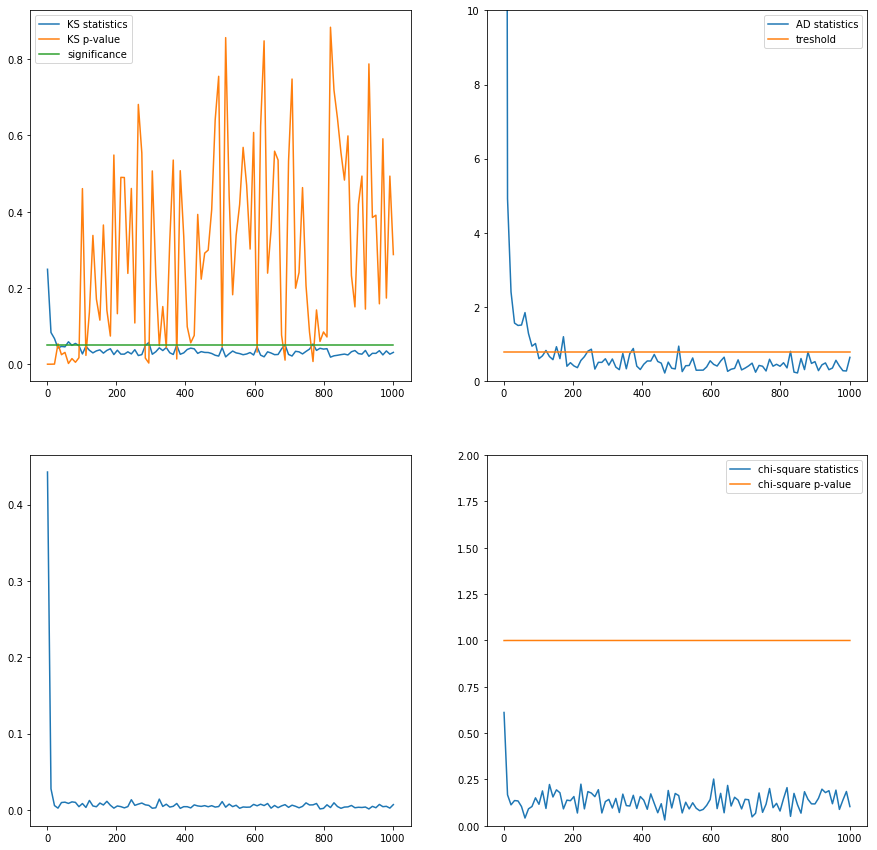

In [144]:
threshold = st.anderson(dist_gaussian, dist='norm')[1][st.anderson(dist_gaussian,dist='norm')[2]==[5.0]]

fig = pl.figure(figsize = (15,15))

fig.add_subplot(221)
pl.plot(narray, ks_s_poisson, label='KS statistics')
pl.plot(narray, ks_p_poisson, label='KS p-value')
pl.plot([narray[0], narray[-1]],[0.05, 0.05], label="significance")
pl.legend()

fig.add_subplot(222)
pl.plot(narray, ad_poisson,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.legend()

fig.add_subplot(223)
pl.plot(narray, kl_poisson, label='K-L (entropy)')

fig.add_subplot(224)
pl.plot(narray,chi_s_poisson, label='chi-square statistics')
pl.plot(narray,chi_p_poisson, label='chi-square p-value')
pl.ylim(0,2)
pl.legend()

pl.legend();

print("Fig 2. Different goodness-of-fit tests for poisson distribution with different means against gaussian distribution")

#### KS Test: 
Null Hypothesis: The poisson distribution is identical with the Gaussian distribution

Interpretation: As the KS statistics decrease, the p-value has a tendency of becoming larger, therefore it's less likely for us to reject the null hypothesis, the poisson distribution grows similar to Gaussian distribution

#### AD Test:
Null Hypothesis: The sample from a poisson population is no different from the population from a Gaussian distribution 

Interpretation: AD statics drops below the threshold of rejecting $H_0$, therefore we cannot reject the null hypothesis

#### KL Divergence:
Null Hypothesis: There is no information loss between the poisson distribution and Gaussian distribution

Interpretation: The entropy drop means that information loss between the poisson and the Gaussian distribution decreases, it's less likely for us to reject the null hypothesis

#### Chi-square test:
Null Hypothesis: The observed poisson distribution has no difference than the expected normal distribution

Interpretation: p-values increases as Chi-sq statistics drop, therefore we are less likely to reject $H_0$ as mean grows.